<a href="https://colab.research.google.com/github/imiled/DL_Tools_For_Finance/blob/master/Transfert_Learning_Vgg16forSP500.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
%pwd

'/content'

In [4]:
!git clone https://github.com/imiled/DL_Tools_For_Finance.git
%cd /content/DL_Tools_For_Finance  
!git init
!git status
 

Cloning into 'DL_Tools_For_Finance'...
remote: Enumerating objects: 86, done.
remote: Counting objects: 100% (86/86), done.
remote: Compressing objects: 100% (83/83), done.
remote: Total 705 (delta 38), reused 0 (delta 0), pack-reused 619
Receiving objects: 100% (705/705), 89.49 MiB | 31.85 MiB/s, done.
Resolving deltas: 100% (370/370), done.
/content/DL_Tools_For_Finance
Reinitialized existing Git repository in /content/DL_Tools_For_Finance/.git/
On branch master
Your branch is up to date with 'origin/master'.

Untracked files:
  (use "git add <file>..." to include in what will be committed)

	datas/DL_Tools_For_Finance/
	model/vggforsp500.h5

nothing added to commit but untracked files present (use "git add" to track)


In [ ]:
!git log

In [5]:
%cd /content/DL_Tools_For_Finance  
!git add .
!git commit -m "reorganisation of files"
!git config user.email miledismael@gmail.com
!git config user.name imiled
!git push https://github.com/imiled/DL_Tools_For_Finance.git

/content/DL_Tools_For_Finance
hint: You've added another git repository inside your current repository.
hint: Clones of the outer repository will not contain the contents of
hint: the embedded repository and will not know how to obtain it.
hint: If you meant to add a submodule, use:
hint: 
hint: 	git submodule add <url> datas/DL_Tools_For_Finance
hint: 
hint: If you added this path by mistake, you can remove it from the
hint: index with:
hint: 
hint: 	git rm --cached datas/DL_Tools_For_Finance
hint: 
hint: See "git help submodule" for more information.

*** Please tell me who you are.

Run

  git config --global user.email "you@example.com"
  git config --global user.name "Your Name"

to set your account's default identity.
Omit --global to set the identity only in this repository.

fatal: unable to auto-detect email address (got 'root@00af8053e8ad.(none)')
fatal: could not read Username for 'https://github.com': No such device or address


In [6]:
%cd /content/DL_Tools_For_Finance/datas
%ls -l

/content/DL_Tools_For_Finance/datas
total 38580
-rw-r--r--  1 root root 18763426 Aug 30 15:58 298_2020_1980.xlsx
drwxr-xr-x 12 root root     4096 Aug 30 16:21 DL_Tools_For_Finance/
-rw-r--r--  1 root root  4142609 Aug 30 15:58 X_test_image.csv
-rw-r--r--  1 root root 16539890 Aug 30 15:58 X_train_image.csv
-rw-r--r--  1 root root     5924 Aug 30 15:58 Y_test_FutPredict_image.csv
-rw-r--r--  1 root root     2988 Aug 30 15:58 Y_test_StateClass_image.csv
-rw-r--r--  1 root root    23807 Aug 30 15:58 Y_train_FutPredict_image.csv
-rw-r--r--  1 root root    11958 Aug 30 15:58 Y_train_StateClass_image.csv


In [7]:
%cd /content/DL_Tools_For_Finance

/content/DL_Tools_For_Finance


###Requirement instalation

In [6]:
!pip3 install -r requirements.txt  

     |████████████████████████████████| 4.4MB 7.1MB/s 
     |████████████████████████████████| 245kB 39.6MB/s 
     |████████████████████████████████| 5.5MB 36.7MB/s 
     |████████████████████████████████| 235kB 31.2MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.54-py2.py3-none-any.whl size=22409 sha256=de8ce74a80383ae894f558ebe6c7fcb889f2e4e9e8cc150677d389cea07e149a
  Stored in directory: /root/.cache/pip/wheels/f9/e3/5b/ec24dd2984b12d61e0abf26289746c2436a0e7844f26f2515c
  Created wheel for investpy: filename=investpy-1.0-cp36-none-any.whl size=4465841 sha256=ced469c6e5a532e3158f98ccd47874e125d1bf61679f0e4767c8910c9363cb9b
  Stored in directory: /root/.cache/pip/wheels/ed/a0/ec/5866604d61abe747911c1ecafeea8ac27b5b17670e1191782a
Successfully built yfinance investpy
ERROR: datascience 0.10.6 has requirement coverage==3.7.1, but you'll have coverage 5.2.1 which is incompatible.
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is inco

In [7]:
%cd /content/DL_Tools_For_Finance

/content/DL_Tools_For_Finance


In [10]:
!python3 step1_generate_dataset_IndexImage.py

/usr/local/lib/python3.6/dist-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal
[*********************100%***********************]  1 of 1 downloaded
loop 1 market state : step  0 market state fut market_state    2.0
Name: 1931-12-29 00:00:00, dtype: float64  future value 0.5897810218978102
loop 1 market state : step  1 market state fut market_state    2.0
Name: 1931-12-30 00:00:00, dtype: float64  future value 0.6000000000000001
loop 1 market state : step  2 market state fut market_state    2.0
Name: 1931-12-31 00:00:00, dtype: float64  future value 0.6255474452554745
loop 1 market state : step  3 market state fut market_state    2.0
Name: 1932-01-04 00:00:00, dtype: float64  future value 0.6189781021897811
loop 1 market state : step  4 market state fut market_state    2.0
Name: 1932-01-05 00:00:00, dtype: float64  future 

In [11]:
!python3 step2_loadingtrainingdatas_vgg_transfert_modelandtraining.py

2020-08-30 16:23:01.319192: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
2020-08-30 16:23:04.030094: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcuda.so.1
2020-08-30 16:23:04.033504: E tensorflow/stream_executor/cuda/cuda_driver.cc:314] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2020-08-30 16:23:04.033564: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (00af8053e8ad): /proc/driver/nvidia/version does not exist
2020-08-30 16:23:04.040196: I tensorflow/core/platform/profile_utils/cpu_utils.cc:104] CPU Frequency: 2299995000 Hz
2020-08-30 16:23:04.040458: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x1998f40 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2020-08-30 16:23:04.040500: I tensorflow/com

In [12]:
!python3 step3_evaluate_vggsp500_model.py

2020-08-30 16:37:30.432741: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
2020-08-30 16:37:32.286170: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcuda.so.1
2020-08-30 16:37:32.290534: E tensorflow/stream_executor/cuda/cuda_driver.cc:314] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2020-08-30 16:37:32.290594: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (00af8053e8ad): /proc/driver/nvidia/version does not exist
2020-08-30 16:37:32.297711: I tensorflow/core/platform/profile_utils/cpu_utils.cc:104] CPU Frequency: 2299995000 Hz
2020-08-30 16:37:32.298008: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x1d7cbc0 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2020-08-30 16:37:32.298050: I tensorflow/com

In [14]:
!python3 step4_guess_future_marketstate_from_image.py

After resizing: (32, 32, 3)
Traceback (most recent call last):
  File "step4_guess_future_marketstate_from_image.py", line 20, in <module>
    vggsp500model = load_model(trained_model_path)
NameError: name 'load_model' is not defined


##Step 1 : Generate Dataset of the Image and the Future maket state

In this part we are generating the training and testing dataset.
First we download the historical prices of the sp500 from 1927 to 31 July 2020 and built the image of 15 days historical graph also we get the 5 days future price evolution of the sp500. 
From the future price evolution, we calculate a future state which can be splitted in 6 classes :

Sell-Sell | Sell- Neutral | Neutral | Neutral -Buy | Buy -Buy (and the Error class)

The objective is to get the following files which represent a dataframe in the data/ repertory:

X_train_image.csv , X_test_image.csv a 3072 column time serie dataframe  of the image (32 x 32 x3) of the sp500 closing price 

Y_test_StateClass.csv, Y_train_StateClass.csv a 1 column time serie dataframe of the future state value betwwen -1 to 4

We generate also the following files but we won´t use it in this project - more fore RNN & price prediction - Y_test_FutPredict.csv Y_train_FutPredict.csv

the testing and training time serie dataset are shuffled by the date of reference with a split number of 0.8

Please note that: 
1. We can increase the dataset taking into account the evolution very liquid stocks or other indices as long as we have very high the liquidity and number of participants 
2. The calculation of the dataset can take more than 6 hours of calulation as the code is not optimized so far, we can quickly implement parallel computing and rapid image setup instead of using matplotlib library

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import bs4 as bs
import requests
import yfinance as yf
import fix_yahoo_finance as yf
import datetime
import io
import cv2
import skimage
import datetime
from PIL import Image
from pandas_datareader import data as pdr
from skimage import measure
from skimage.measure import block_reduce
from datetime import datetime

'''
Functions to be used for data generation 
'''

def get_img_from_fig(fig, dpi=180):
# get_img_from_fig is function which returns an image as numpy array from figure
    buf = io.BytesIO()
    fig.savefig(buf, format="png", dpi=dpi)
    buf.seek(0)
    img_arr = np.frombuffer(buf.getvalue(), dtype=np.uint8)
    buf.close()
    img = cv2.imdecode(img_arr, 1)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    return img

def build_image(stockindex, idate=10, pastlag=10, futlag=3,nb_dates=1000):
# Build image from a table stockindex price list 
#return a (32,32,3) np.array representing the image in color
#ising idate as a starting point
#paslag futlag number of days to consider for translate
  sp500close=stockindex
  nb_days=nb_dates

  x_datas=[]
  x_datas=np.zeros((32,32,3))
  i=idate
  
  fig=plt.figure()
  ax=fig.add_subplot(111)
  ax.plot(sp500close[(i-pastlag):i])
  plot_img_np = get_img_from_fig(fig)
  x_tmp= skimage.measure.block_reduce(plot_img_np[90:620,140:970], (18,28,1), np.mean)
  (x_datas[1:-1])[:,1:-1][:]=x_tmp
  fig.clear()
  plt.close(fig)
    
  x_datas=x_datas/255
  return x_datas
  
'''
MAIN FUNCTION OF CLASSIFICATION 
build y state y fut 
and x  
'''
def class_shortterm_returnfut(x, yfut, indexforpast,tpastlag):
#this function is use to classifiy the future state based on the position of future value with the past range 
#Put the value from the 2 boxes (max min) or (open close) on the time range  and check if it is within
#go down go up or exit the box
#the fucntion return 5 state depending on the future value position on the boxes and one state for error cases

  xpast_min=np.min(x[(indexforpast-tpastlag):indexforpast])
  xpast_max=np.max(x[(indexforpast-tpastlag):indexforpast])
  x_open=x[int(indexforpast-tpastlag)]
  x_close=x[indexforpast]
  
  if (yfut < xpast_min ): return 0
  elif  (yfut < min(x_open,x_close)): return 1
  elif  (yfut < max(x_open,x_close)): return 2
  elif  (yfut < xpast_max): return 3
  elif  (yfut > xpast_max): return 4
  else  : return -1

def main_class_shortterm_returnfut(iterable):
  return class_shortterm_returnfut(sp500close, iterable, pastlag,futlag)



def normalise_df_image(xdf):
#normalisation to 0,1 range of the equity index
  df_tmp=xdf
  maxval=np.max(df_tmp)
  df_tmp=df_tmp/maxval
  return df_tmp, maxval

def build_image(stockindex, idate=10, pastlag=10, futlag=3):
#another version of returning image from a data frame index
#using the pastlag as range for the graph
#ising idate as a starting point
#return a (32,32,3) np array

  #number of days to consider for translate
  sp500close=stockindex
  x_datas=[]
  x_datas=np.zeros((32,32,3))
  i=idate
  
  fig=plt.figure()
  ax=fig.add_subplot(111)
  ax.plot(sp500close[(i-pastlag):i])
  plot_img_np = get_img_from_fig(fig)
  x_tmp= skimage.measure.block_reduce(plot_img_np[90:620,140:970], (18,28,1), np.mean)
  (x_datas[1:-1])[:,1:-1][:]=x_tmp
  fig.clear()
  plt.close(fig)
    
  x_datas=x_datas/255
  return x_datas

def build_image_optimfig(fig, stockindex, idate=10, pastlag=10, futlag=3):
#version of returning image from a data frame index
#using the pastlag as range for the graph
#ising idate as a starting point
#return a (32,32,3) np array
#this one is optimisng the use of ram 

  #number of days to consider for translate
  sp500close=stockindex
  x_datas=[]
  x_datas=np.zeros((32,32,3))
  i=idate
  
  plt.plot(sp500close[(i-pastlag):i])
  plot_img_np = get_img_from_fig(fig)
  x_tmp= skimage.measure.block_reduce(plot_img_np[90:620,140:970], (18,28,1), np.mean)
  (x_datas[1:-1])[:,1:-1][:]=x_tmp
    
  x_datas=x_datas/255
  return x_datas

def build_image_df(xdf, past_step,fut_step) :
  '''
  returning a dictionary of time series dataframes to be used in setup_input_NN_image so a to generate 
  Input X Result Y_StateClass, Y_FutPredict
  pastlag as range for the graph
  fut _step the future value lag in time to predict or to check the financial state of the market 
  #times series to get information from the stock index value
  'stock_value':the time serie of the index normalised on the whole period
  'moving_average':  time serie of the rolling moving average value of the index for past step image
  "max": time serie of the rolling max  value of the index for past step image
  "min": time serie of the rolling  min value of the index for past step image
  'volatility':  time serie of the rolling  vol value of the index for past step image
          
  'df_x_image': is a time series of flattened (1, ) calculed from images (32, 32, 3) list 
  #I had to flatten it because panda does not create table with this format
  'market_state': future markket state to be predicted time lag is futlag
  'future_value': future value of stock price to predict  time lag is futlag
  'future_volatility':  time serie of the future volatility of the index time lag is futlag
  '''

  df_stockvaluecorrected=xdf
  df_stockvaluecorrected, _ = normalise_df_image(df_stockvaluecorrected)
  df_pctchge = df_stockvaluecorrected.pct_change(periods=past_step)
  df_movave = df_stockvaluecorrected.rolling(window=past_step).mean()
  df_volaty = np.sqrt(252)*df_pctchge.rolling(window=past_step).std()
  df_max =df_stockvaluecorrected.rolling(window=past_step).max()
  df_min =df_stockvaluecorrected.rolling(window=past_step).min()
  df_Fut_value =df_stockvaluecorrected.shift(periods=-fut_step)
  df_Fut_value.name='future_value'
  df_Fut_volaty =df_volaty.shift(periods=-fut_step)
  
  df_market_state=pd.DataFrame(index=df_stockvaluecorrected.index,columns=['market_state'],dtype=np.float64)
  
  tmpimage=build_image(df_stockvaluecorrected,past_step+1,pastlag=past_step,futlag=fut_step)
  flatten_image=np.reshape(tmpimage,(1,-1))
  colname_d_x_image_flattened = ['Image Col'+str(j) for j in range(flatten_image.shape[1])]

  np_x_image=np.zeros((len(df_stockvaluecorrected.index),flatten_image.shape[1]))
  
  for i in range(len(df_stockvaluecorrected.index)):
        yfut=df_Fut_value.iloc[i]
        df_market_state.iloc[i]=class_shortterm_returnfut(df_stockvaluecorrected,yfut, i,tpastlag=past_step)
        print("loop 1 market state :", "step ",i,"market state fut", df_market_state.iloc[i]," future value",df_Fut_value.iloc[i] )
  df_market_state.index=df_Fut_value.index

  fig=plt.figure()
  for i in range(len(df_stockvaluecorrected.index)):
        try:
          tmpimage=build_image_optimfig(fig, df_stockvaluecorrected,i,pastlag=past_step,futlag=fut_step)
          np_x_image[i,:]=np.reshape(tmpimage,(1,-1))
          print("loop 2 image :", "step ",i,"market state fut", df_market_state.iloc[i]," future value",df_Fut_value.iloc[i] )
        except:
           print("error at index", i)
           

  df_x_image=pd.DataFrame(data=np_x_image,columns=colname_d_x_image_flattened, index=df_stockvaluecorrected.index)
  fig.clear
  plt.close(fig)


  df_data= {
          'stock_value': df_stockvaluecorrected, 
          'moving_average': df_movave, 
          "max": df_max, 
          "min": df_max,
          'volatility': df_volaty,
          'future_volatility': df_Fut_volaty,
          
          'df_x_image':df_x_image,
          'market_state':df_market_state,
          'future_value': df_Fut_value,

          }

  return df_data

def build_image_clean(stockindex_ohlcv, ret_image_size=(32,32,3), idate=10, pastlag=32):
  '''
  TO BE COMPLETED
  NOT USED NOW
  
  change one date into an array (32,32,3)
  Each absciss pixel is one day
  in ordinate the min value of ohlc shall be 0 (volume is tabled on the third image) 
  in ordinate the max value of ohlc shall be  (volume is tabled on the third image) 
  1st image: 32 x32
    based on each day we place the open and close point
    in ordinate int (255 * price /max ohlc)
    with value of  255 for close and 127 for open
  2nd image: 32 x32
    based on each day we place the high low point 
    in ordinate int (255 * price /max ohlc)
    with 64 for high and 32 for low
  3rd image: 32 x32
    each column value is a equal to int 255* volume of day / volume max period)
  '''
  #number of days to consider for translate
  tsindexstock=stockindex_ohlcv.iloc[(idate-pastlag):idate]
  valmax=np.max(np.array(tsindexstock[tsindexstock.columns[:-1]]))
  valmin=np.min(np.array(tsindexstock[tsindexstock.columns[:-1]]))
  vol=tsindexstock[tsindexstock.columns[-1]]
  
  x_datas=np.zeros(ret_image_size)
  
  return x_datas
  
def setup_input_NN_image(xdf, past_step=25,fut_step=5, split=0.8):
  '''
  this function the time serie of the index price 
  and generate the random dataset with split value from the whole time serie
  X is a time serie of the flattened 32, 32 ,3 image list
  Y_StateClass is a time serie of future state to predict with a classification made with class_shortterm_returnfut
  Y_FutPredict is the time serie of stocke index shifted in time to be predicted
  we randomize the dates and retun 2 set of dataframes
  '''
  xdf_data=build_image_df(xdf,past_step,fut_step)
  
  tmp_data=pd.concat([xdf_data['market_state'],xdf_data['future_value'],xdf_data['df_x_image']],axis=1)
  tmp_data=tmp_data.dropna()

  Y_StateClass= tmp_data['market_state']
  Y_FutPredict= tmp_data['future_value']  
  X=tmp_data.drop(columns=['market_state','future_value'])

  nb_dates=len(Y_StateClass.index)
  rng = np.random.default_rng()
  list_shuffle = np.arange(nb_dates)
  rng.shuffle(list_shuffle)
  split_index=int(split*nb_dates)
    
  train_split=list_shuffle[:split_index]
  test_split=list_shuffle[(split_index+1):]

  X_train=(X.iloc[train_split])
  Y_train_StateClass=(Y_StateClass.iloc[train_split])
  Y_train_FutPredict=(Y_FutPredict.iloc[train_split])

  X_test=(X.iloc[test_split])
  Y_test_StateClass=(Y_StateClass.iloc[test_split])
  Y_test_FutPredict=(Y_FutPredict.iloc[test_split])

  return (X_train, Y_train_StateClass, Y_train_FutPredict), (X_test, Y_test_StateClass, Y_test_FutPredict)

def change_X_df__nparray_image(df_X_train_image_flattened ):
  '''
  setup_input_NN_image returns a dataframe of flaten image for x train and xtest
  then this function will change each date into a nparray list of images with 32, 32, 3 size 
  '''
  X_train_image=df_X_train_image_flattened
  nb_train=len(X_train_image.index)
  
  x_train=np.zeros((nb_train,32,32,3))
  for i in range(nb_train):
    tmp=np.array(X_train_image.iloc[i])
    tmp=tmp.reshape(32,32,3)
    x_train[i]=tmp
  return x_train


'''
COMMAND NOW FOR THE DATSET GENERATION
'''

#Recuperation from yahoo of sp500 large history
start = datetime(1920,1,1)
end = datetime(2020,7,31)
yf.pdr_override() # <== that's all it takes :-)
sp500 = pdr.get_data_yahoo('^GSPC', 
                           start,
                             end)

#generate the dataset it can take 6 - 8 hours
#Need to be optimzed with more time
testsp500=(sp500['Close'])[1000:2000]
(X_train_image, Y_train_StateClass_image, Y_train_FutPredict_image) , (X_test_image, Y_test_StateClass_image, Y_test_FutPredict_image) = setup_input_NN_image(testsp500)

#copy the datafrae dataset in csv format to be used after
#dateTimeObj = datetime.now()
#timeStr = dateTimeObj.strftime("%Y_%m_%d_%H_%M_%S_%f")

X_train_image.to_csv('datas/X_train_image.csv')
Y_train_StateClass_image.to_csv('datas/Y_train_StateClass_image.csv')
Y_train_FutPredict_image.to_csv('datas/Y_train_FutPredict_image.csv')

X_test_image.to_csv('datas/X_test_image.csv')
Y_test_StateClass_image.to_csv('datas/Y_test_StateClass_image.csv')
Y_test_FutPredict_image.to_csv('datas/Y_test_FutPredict_image.csv')



ModuleNotFoundError: ignored

##Step 2: Loading training datas with vgg16 transfert model and training

####Loading and Cleaning Training Datas 

This part is for loading the training dataset as it is better to generate it once for all in step 1 because of it time consuming process.

This part also configure back the X_train datas from dataframe based on columns to a (32,32,3) np. array for the input of the model

In [19]:
import numpy as np
import pylab as plt
import pandas as pd

from keras.datasets import cifar10
from keras.utils import np_utils
from keras.models import Sequential
from keras import optimizers
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from keras.layers import Dropout, Flatten, GlobalAveragePooling2D
from keras.optimizers import Adam

'''
UTILITY FUNCTIONS
'''

def change_X_df__nparray_image(df_X_train_image_flattened ):
  '''
  setup_input_NN_image returns a dataframe of flaten image for x train and xtest
  then this function will change each date into a nparray list of images with 32, 32, 3 size 
  '''
  X_train_image=df_X_train_image_flattened
  nb_train=len(X_train_image.index)
  
  x_train=np.zeros((nb_train,32,32,3))
  for i in range(nb_train):
    tmp=np.array(X_train_image.iloc[i])
    tmp=tmp.reshape(32,32,3)
    x_train[i]=tmp
  return x_train

'''
MAIN EXECUTIONS
'''
#recuperation of datas 
X_train_image=pd.read_csv('datas/X_train_image.csv')
Y_train_StateClass_image=pd.read_csv('datas/Y_train_StateClass_image.csv')
Y_train_FutPredict_image=pd.read_csv('datas/Y_train_FutPredict_image.csv')


#setting up the index to Date
X_train_image=X_train_image.set_index("Date")
Y_train_StateClass_image=Y_train_StateClass_image.set_index("Date")
Y_train_FutPredict_image=Y_train_FutPredict_image.set_index("Date")

#modify dataset to np array for input to NN
x_train=change_X_df__nparray_image(X_train_image)
y_train_state=np.array(Y_train_StateClass_image)
y_train_value=np.array(Y_train_FutPredict_image)

##Setting up xtrain and ytrain
#Here we focus on predicting the future state Y_train_StateClass_image
nb_train=len(X_train_image.index)
x_train=np.zeros((nb_train,32,32,3))
for i in range(nb_train):
  tmp=np.array(X_train_image.iloc[i])
  tmp=tmp.reshape(32,32,3)
  x_train[i]=tmp
  
y_train=np.array(Y_train_StateClass_image)
#y_train=np.array(Y_train_FutPredict_image)

nb_train=len(X_train_image.index)
x_train=np.zeros((nb_train,32,32,3))
for i in range(nb_train):
  tmp=np.array(X_train_image.iloc[i])
  tmp=tmp.reshape(32,32,3)
  x_train[i]=tmp

y_train=np.array(Y_train_StateClass_image)
#y_train=np.array(Y_train_FutPredict_image)

Now we check the datas

In [ ]:
print("number of dates max",len(y_train)+len(y_test))
print("number of dates actual",len(y_train))
print("shape of y and x train", y_train.shape, " and ", x_train.shape)
print("shape of y and x test", y_test.shape, " and ", x_test.shape)
print("min value of datas", np.min(y_train), ", max value of datas",np.max(y_test))

In [ ]:
import matplotlib.pyplot as plt

fig2 = plt.figure(figsize=(10, 6))
x_datas=x_train[75]
for i in range(10,18,1):
    img = x_datas[:-1][:-1]
    fig2.add_subplot(2, 4, i+1-10)
    plt.imshow(img)


print('Shape of each image in the training data: ', x_datas.shape[:])

####Build up and training of the VGGsp500 model 

In this part we suppose that we have the training dataset taken from step 2. We use a Transfert model for vgg16 and some other layers. we use for this example a categorical_crossentropy loss and rmsprop optimizer. This part can be fined tuned for each financial index or stock index (layers, optimmizer, metrics, dropout) but in this case we introduced a simplier case. We train and save the model, please refer to XX to see the convergence of the model.

We have 14.7M parameters and 66k trainable parametres. the size of training input is 571M only for the image not including rolling volatility, moving average etc

NB: If you have an error on size of input of the ytrain you have to reload the input executing  step 2 once again

NameError: ignored

In [20]:

import numpy as np
import pylab as plt
import pandas as pd

from keras.datasets import cifar10
from keras.utils import np_utils
from keras.models import Sequential
from keras import optimizers
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from keras.layers import Dropout, Flatten, GlobalAveragePooling2D
from keras.optimizers import Adam

'''
we suppose that we have loaded xtrain and ytrain
This part is based on the Design of the NN
Her we find the Vgg16 quite usefull
'''

#Importing the VGG16 model
from keras.applications.vgg16 import VGG16, preprocess_input

#Importing the VGG16 model
from keras.applications.vgg16 import VGG16, preprocess_input

batch_size=32
epochs=50


#Loading the VGG16 model with pre-trained ImageNet weights
vgg_model = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))
vgg_model.trainable = False # remove if you want to retrain vgg weights

vgg_model.summary()

#At this stage we have x and y to train the model
#In our example we need to y into categorical as it has 6 categories
nb_classes=6
y_train = np_utils.to_categorical(y_train, nb_classes)

##Transfert model from vgg
transfer_model = Sequential()
transfer_model.add(vgg_model)
transfer_model.add(Flatten())
transfer_model.add(Dense(128, activation='relu'))
transfer_model.add(Dropout(0.2))
transfer_model.add(Dense(6, activation='softmax'))

##Display summary of neural network
transfer_model.summary()

transfer_model.compile(loss='categorical_crossentropy', optimizer='rmsprop',
              metrics=['accuracy'])

##Fitting the model on the train data and labels.
history = transfer_model.fit(x_train, y_train, \
                              batch_size=batch_size, epochs=epochs, \
                              validation_split=0.2, verbose=1, shuffle=True)

# Saving themodel
transfer_model.save('model/vggforsp500.h5')




Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 32, 32, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 32, 32, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 16, 16, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 16, 16, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 16, 16, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 8, 8, 128)         0     

##Step 3: Evaluate the VGGsp500 model

This part will evaluate the model with the testing dataset that we generated in first step. We show the accuracy, the confusion matrix and the classification report

In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix
from keras.utils import np_utils
from keras.models import load_model
from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator

'''
Here we have a trained model model/vggforsp500.h5 and datas for testing 
datas/X_test_image.csv
datas/Y_test_StateClass_image.csv
datas/Y_test_FutPredict_image.csv

'''

##
'''
UTILITY FUNCTIONS
to put in another file
'''

def change_X_df__nparray_image(df_X_train_image_flattened ):
  '''
  setup_input_NN_image returns a dataframe of flaten image for x train and xtest
  then this function will change each date into a nparray list of images with 32, 32, 3 size 
  '''
  X_train_image=df_X_train_image_flattened
  nb_train=len(X_train_image.index)
  
  x_train=np.zeros((nb_train,32,32,3))
  for i in range(nb_train):
    tmp=np.array(X_train_image.iloc[i])
    tmp=tmp.reshape(32,32,3)
    x_train[i]=tmp
  return x_train
##


trained_model_path='model/vggforsp500.h5'

#recuperation of testing datas and organising it 
X_test_image=pd.read_csv('datas/X_test_image.csv')
Y_test_StateClass_image=pd.read_csv('datas/Y_test_StateClass_image.csv')
Y_test_FutPredict_image=pd.read_csv('datas/Y_test_FutPredict_image.csv')

#setting up the index to Date
X_test_image=X_test_image.set_index("Date")
Y_test_StateClass_image=Y_test_StateClass_image.set_index("Date")
Y_test_FutPredict_image=Y_test_FutPredict_image.set_index("Date")

#modify dataset to np array for input to NN
x_test=change_X_df__nparray_image(X_test_image)
y_test_state=np.array(Y_test_StateClass_image)
y_test_value=np.array(Y_test_FutPredict_image)

##Setting up xtest and ytest
#Here we focus on predicting the future state Y_train_StateClass_image
nb_test=len(X_test_image.index)
x_test=np.zeros((nb_test,32,32,3))
for i in range(nb_test):
  tmp=np.array(X_test_image.iloc[i])
  tmp=tmp.reshape(32,32,3)
  x_test[i]=tmp

y_test=np.array(Y_test_StateClass_image)
#y_test=np.array(Y_test_FutPredict_image)

#In our example we need to y into categorical as it has 6 categories
nb_classes=6
y_test_m = np_utils.to_categorical(y_test, nb_classes)
############
#recuperation of model
vggsp500model = load_model(trained_model_path)

#Evaluate the model on the test data
score  = vggsp500model.evaluate(x_test, y_test_m)


Y_pred = vggsp500model.predict(x_test)
y_pred = np.argmax(Y_pred, axis=1)
y= np.argmax(y_test_m,axis=1)


print('Confusion Matrix')

target_state = ['SS', 'SN', 'N','NB','BB']

def statetostring(x):
  return target_state[int(x)]

sY_pred=[statetostring(i) for i in y_pred]
sY_real=[statetostring(i) for i in y]

#matrice  de confusion
mat=confusion_matrix(sY_real, sY_pred, normalize='true', labels=target_state)
df_confmat=pd.DataFrame(mat,index=target_state, columns=target_state)

#Accuracy on test data
print('Accuracy on the Test Images: ', score[1])
#matrice  de confusion
print(df_confmat)

# Classification report
print('classification report')
print(classification_report(sY_real, sY_pred, target_names=target_state))


7/7 [==============================] - 2s 260ms/step - loss: 1.3113 - accuracy: 0.4293
Confusion Matrix
Accuracy on the Test Images:  0.4292929172515869
          SS        SN         N   NB        BB
SS  0.000000  0.000000  0.266667  0.0  0.733333
SN  0.000000  0.117647  0.470588  0.0  0.411765
N   0.016667  0.066667  0.200000  0.0  0.716667
NB  0.000000  0.000000  0.151515  0.0  0.848485
BB  0.000000  0.000000  0.027397  0.0  0.972603
classification report
              precision    recall  f1-score   support

          SS       0.44      0.97      0.61        73
          SN       0.39      0.20      0.26        60
           N       0.00      0.00      0.00        33
          NB       0.33      0.12      0.17        17
          BB       0.00      0.00      0.00        15

    accuracy                           0.43       198
   macro avg       0.23      0.26      0.21       198
weighted avg       0.31      0.43      0.32       198



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


##Step 4: Guess future market state from random image

Take an image of an historical graph from a market webpage like investing.com and save it to the ImageM/ folder with name image1.PNG or you can change the value of image_path to the link you need.

This execution tell us which market state in the future is the best representative.

In [15]:
import numpy as np
import pandas as pd
from PIL import Image

from sklearn.metrics import classification_report, confusion_matrix
from keras.utils import np_utils
from keras.models import load_model
from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator

#path for trained model
trained_model_path='model/vggforsp500.h5'

#path for the image taken by the user
image_path='ImageM/image1.PNG'

#Load the image and resize it to 32x32 and taking off the transparency
load_img_rz = np.array(Image.open(image_path).resize((32,32)))
#Image.fromarray(load_img_rz).save('/content/drive/My Drive/_sample_data/ImageM/image1.PNG')
image=load_img_rz[:,:,:3]/255
print("After resizing:",image.shape)

#petite astuce pour ne pas avoir d erreur avec les types list, tensors,  nparray et dataframe
doubleimage=np.array([image,image])
############
#recuperation of the model
vggsp500model = load_model(trained_model_path)
Y_pred = vggsp500model.predict(doubleimage)
y_pred = np.argmax(Y_pred, axis=1)

target_state = ['SS', 'SN', 'N','NB','BB','Error']
df_result=pd.DataFrame((Y_pred))

df_result.columns=target_state
df_result.index=[image_path, image_path+'1']
print ("for ",image_path, "the best result is ", target_state[int(y_pred[0])] )

df_result

After resizing: (32, 32, 3)
for  ImageM/image1.PNG the best result is  SN


,SS,SN,N,NB,BB,Error
ImageM/image1.PNG,0.024653,0.600293,0.255611,0.079769,0.039675,1.587678e-07
ImageM/image1.PNG1,0.024653,0.600293,0.255611,0.079769,0.039675,1.587678e-07


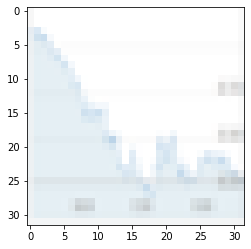

In [16]:
import matplotlib.pyplot as plt
plt.imshow(image)